<div class="alert alert-block alert-success">
<b>Step 1:</b> Importing necessary libraries to be used, creating a data for analysis and plotting the data.<br>
    Here X is the real data and y is the true label associated with the data. 
</div>

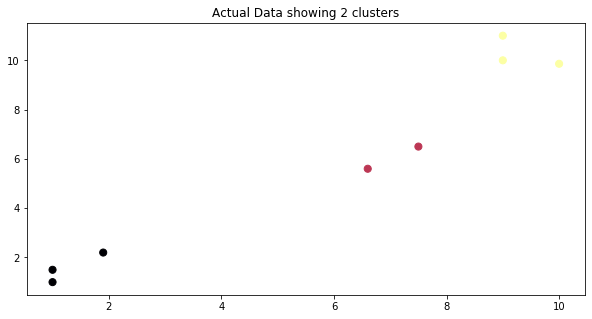

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
X = np.array([[1,1],
              [1,1.5],
              [1.9,2.2],
              [7.5,6.5],
              [6.6,5.6],
              [9,10],
              [9,11],
              [10,9.86]
              
             ])
y = [1,1,1,2,2,3,3,3]
fig,ax = plt.subplots(figsize=(10,5))
ax.set_title("Actual Data showing 2 clusters")
ax.scatter(X[:,0],X[:,1],c=y,s=50,cmap = 'inferno');

<div class="alert alert-block alert-success">
<b>Step 2 (Parameters for Mean shift clustering):</b>  Here we declare the parameters needed for mean shift clustering.
</div>

In [62]:
bandwidth = 3   #can be called radius when data has only 2 features
n_iter    = 10

<div class="alert alert-block alert-success">
<b>Step 3 (cluster centroids initialization):</b> All data points are initialised to be cluster centroids. We will do the grouping of similar centroids together in the next step
</div>

In [52]:
centroids = dict(zip(range(X.shape[0]),np.array([X[i,:] for i in range(X.shape[0])])))

<div class="alert alert-block alert-success">
<b>Step 4 (Iterations for mean shift clustering):</b>  We perform the necessary iterations for mean shift clustering to decide the clusters needed at the end.
</div>

In [53]:
for n in range(n_iter):
    new_centroids = centroids.copy()
    updated_sample = []
    for i in range(len(centroids)):
        centroid = centroids[i]
        neighbor = []
        index    = []
        for i in range(X.shape[0]):
            sample = X[i,:]
            if np.linalg.norm(sample-centroid)<bandwidth:
                neighbor.append(sample)
                index.append(i)
        new_centroid = np.average(neighbor,axis= 0)
        for j in range(len(neighbor)):
            new_centroids[index[j]] = new_centroid
    centroids = new_centroids

<div class="alert alert-block alert-success">
<b>Step 5 (Cluster Centroids):</b>  We finally set the final clusters 
</div>

In [63]:
final_centroids =list(new_centroids.values())
unique_centroids = np.unique(final_centroids,axis=0)
clusters = dict(zip(range(len(unique_centroids)),np.array([unique_centroids[i,:] for i in range(unique_centroids.shape[0])])))
getcluster = lambda val : [k for k,v in clusters.items() if (v == val).sum()==len(val)][0]
df = pd.DataFrame(columns=['Sample_data','Centroids','clusters'])
df['Sample_data']=list(X)
df['Centroids']  =list(final_centroids)
df['clusters']   = [getcluster(final_centroids[i]) for i in range(len(final_centroids))]
df

,Sample_data,Centroids,clusters
0,"[1.0, 1.0]","[1.3, 1.5666666666666667]",0
1,"[1.0, 1.5]","[1.3, 1.5666666666666667]",0
2,"[1.9, 2.2]","[1.3, 1.5666666666666667]",0
3,"[7.5, 6.5]","[7.05, 6.05]",1
4,"[6.6, 5.6]","[7.05, 6.05]",1
5,"[9.0, 10.0]","[9.333333333333334, 10.286666666666667]",2
6,"[9.0, 11.0]","[9.333333333333334, 10.286666666666667]",2
7,"[10.0, 9.86]","[9.333333333333334, 10.286666666666667]",2


<div class="alert alert-block alert-success">
<b>Step 6 (Plotting final clusters):</b>  We plot the final clusters to see that our implementation of Mean-shift clustering gives the same cluster as original.
</div>

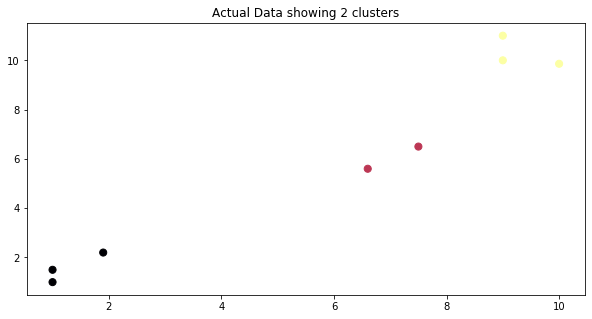

In [60]:
fig,ax = plt.subplots(figsize=(10,5))
ax.set_title("Actual Data showing 2 clusters")
ax.scatter(X[:,0],X[:,1],c=df['clusters'].values,s=50,cmap = 'inferno');

<div class="alert alert-block alert-success">
<b>Step 7 (Using pre-defined function in sklearn):</b>  We will use a predefined function in sklearn for mean shift clustering to get the results on a bigger dataset now
</div>

In [65]:
from sklearn.cluster import MeanShift
from sklearn.datasets import make_blobs

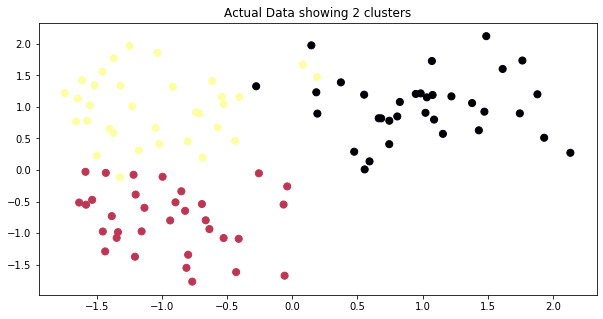

In [82]:
centers = [[1, 1], [-1, -1],[-1,1]]
X, labels_true = make_blobs(n_samples=100, centers=centers, cluster_std=0.5,random_state=0)
fig,ax = plt.subplots(figsize=(10,5))
ax.set_title("Actual Data showing 2 clusters")
ax.scatter(X[:,0],X[:,1],c=labels_true,s=50,cmap = 'inferno');

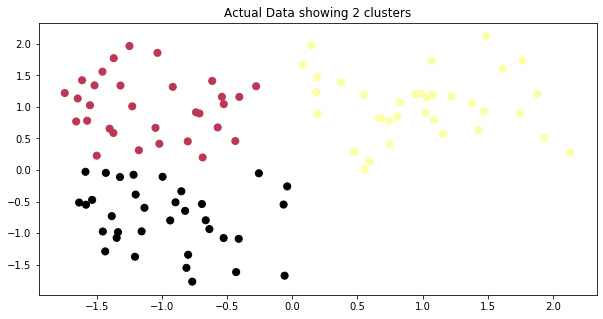

In [84]:
meanshift = MeanShift(bandwidth=1).fit(X)
our_labels = meanshift.labels_
fig,ax = plt.subplots(figsize=(10,5))
ax.set_title("Actual Data showing 2 clusters")
ax.scatter(X[:,0],X[:,1],c=our_labels,s=50,cmap = 'inferno');